# ELE492 - Image Processing - Homework 3

## Anıl Karaca - 21728405

I pledge that I have not received or given any aid in this homework. All the work presented below is my own work. 

Anıl Karaca 21728405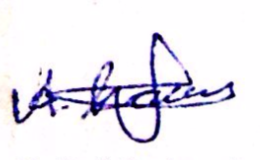

In [1]:
#Importing relevant modules
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage import color
from skimage import io

## Generating Images

I will now generate the half white and half black image. 

Firstly I create a new empty (2x2) image and set the pixels on the left half([0,0] and [0,1]) to be white. And then, I rescale this (2x2) image to be an (200x200) image.

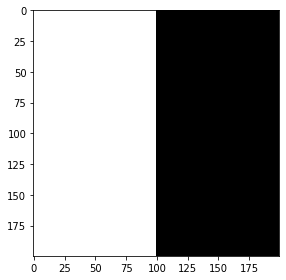

In [2]:
img_a = Image.new("RGB", (2,2)) # Create an empty (2x2) image
pixels = img_a.load() # Initialize the pixels array

# Make pixels the pixels on the left side white and let the other ones still be black
# (255,255,255) in RGB is the color "white"
pixels[0,0]=(255,255,255)
pixels[0,1]=(255,255,255)

#We have to use Image.NEAREST otherwise the new image we get will contain gray pixels
img_a = img_a.resize((200,200), Image.NEAREST)
img_a.save("img_a.png") # Save the image so we can work with it later
io.imshow("img_a.png") # Print the saved image

This time I will generate the white and black grid image. 

Firstly I create a (25x25) white box and a (25x25) black box. And then, I'll keep appending these arrays together until the image we want is obtained.

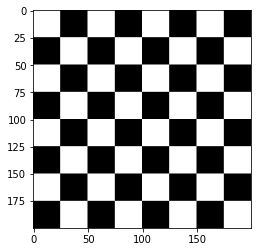

In [3]:
# Create a (25x25) white box and a (25x25) black box
black_box = np.zeros((25,25), dtype=int)
white_box = np.ones((25,25), dtype=int)
white_box *= 255 # Needs to be in the RGB format

# Create a row with the given pattern(Starting with white box)
row_white = white_box
for i in range(0,4):
    row_white = np.append(row_white, black_box, 1)
    if i!=3: # Pattern ends with a black box so we check if we are done
        row_white = np.append(row_white, white_box, 1)
                
# Create a row with the given pattern(Starting with black box)
row_black = np.flip(row_white, 1)        

# Keep appending row_white and row_black until the pattern we want is obtained.
pattern = row_white
for i in range(0,4):
    pattern = np.append(pattern, row_black,0)
    if (i!=3): 
        pattern = np.append(pattern, row_white,0)

# Plot and save the result
img_b = Image.fromarray(np.uint8(pattern)).convert('RGB') # Convert the numpy array into PIL image format
img_b.save('img_b.png') # Save the image so we can work with it later
plt.imshow(pattern,cmap='gray', vmin=0, vmax=255)

## Plotting Histograms

I will now plot the histogram of the half white and half black image.

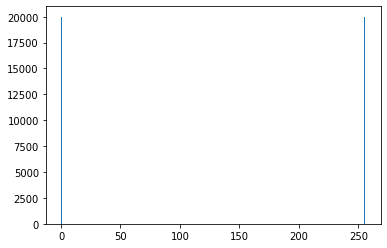

In [4]:
img_a = cv2.imread("img_a.png", 0) # Read the image using OpenCV

# Plot the histogram
plt.hist(img_a.ravel(), 256, [0,256])
plt.show()

This time I will plot the histogram of the white and black grid image. 

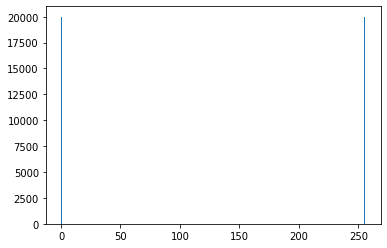

In [5]:
img_b = cv2.imread("img_b.png", 0) # Read the image using OpenCV

# Plot the histogram
plt.hist(img_b.ravel(), 256, [0,256])
plt.show()

## Gaussian Filtering

I will now apply gaussian filtering on the half white and half black image. 

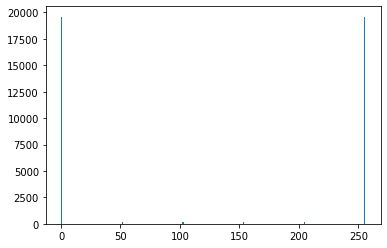

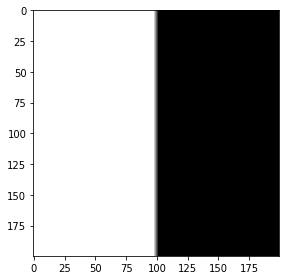

In [6]:
kernel = (5,5)
sigma = 50
img_a_blur = cv2.GaussianBlur(img_a, kernel, sigma) # Apply gaussian filter

# Plot the histogram of the smoothed image
plt.hist(img_a_blur.ravel(),256,[0,256])
plt.show()
# Plot the smoothed image
io.imshow(img_a_blur)

As you can see from the histogram and the image above with kernel size of (5x5) and sigma of 50, we were not able to observe a significant filtering effect on the image

We have some intermediate(gray) values in the middle but it is really hard to observe.

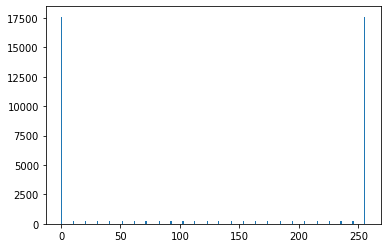

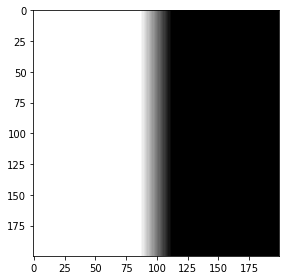

In [7]:
kernel = (25, 25)
sigma = 50
img_a_blur = cv2.GaussianBlur(img_a, kernel, sigma) # Apply gaussian filter

# Plot the histogram of the smoothed image
plt.hist(img_a_blur.ravel(),256,[0,256])
plt.show()
# Plot the smoothed image
io.imshow(img_a_blur)

As you can see from the histogram and the image above with kernel size of (25x25) and sigma of 50, we are now able to observe a significant filtering effect on the image.

Now it's time to apply gaussian filtering on the white and black grid image.

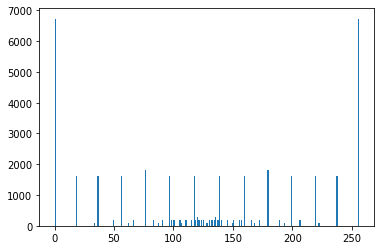

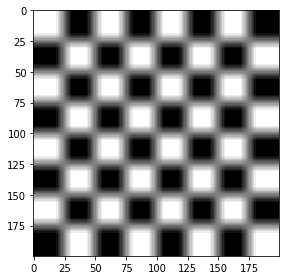

In [8]:
kernel = (13, 13)
sigma = 10
img_b_blur = cv2.GaussianBlur(img_b, kernel, sigma) # Apply gaussian filter

# Plot the histogram of the smoothed image
plt.hist(img_b_blur.ravel(),256,[0,256])
plt.show()
# Plot the smoothed image
io.imshow(img_b_blur)

As you can see from the histogram and the image above with kernel size of (13x13) and sigma of 10, we are able to observe the filtering effect on the image.

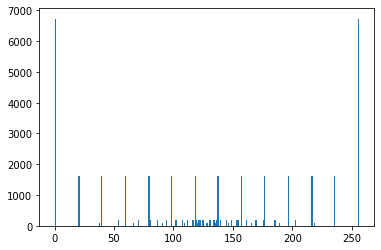

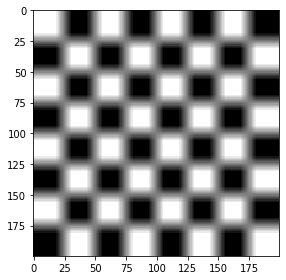

In [9]:
kernel = (13, 13)
sigma = 90
img_b_blur = cv2.GaussianBlur(img_b, kernel, sigma) # Apply gaussian filter

# Plot the histogram of the smoothed image
plt.hist(img_b_blur.ravel(),256,[0,256])
plt.show()
# Plot the smoothed image
io.imshow(img_b_blur)

**CONCLUSION:**

Increasing the kernel size increases the filtering applied on the image.

Increasing the sigma value will apply a broader average over the neighboring pixels, thus decrease the impact of the nearest pixels. Increasing sigma makes the image blurrier but it doesn't affect the overall result as much as the kernel size.

## Discrete Fourier transform(DFT)

I will now take the DFT of the half white and half black image by making use of the built in functions of the **NumPy** module.

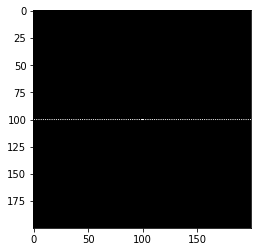

In [10]:
# Take DFT of img_a
f_a = np.fft.fftshift(np.fft.fft2(img_a))
img_a_dft = 20 * np.log(np.abs(f_a + 1e-8))

#  Save and plot the result
cv2.imwrite("img_a_dft.png",img_a_dft)
plt.imshow(img_a_dft, cmap='gray')

This time I will take the DFT of the white and black grid image. 

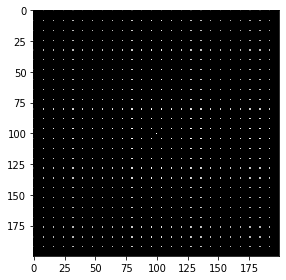

In [11]:
# Take DFT of img_b
f_b = np.fft.fftshift(np.fft.fft2(img_b))
img_b_dft = 20 * np.log(np.abs(f_b + 1e-8))

#  Save and plot the result
cv2.imwrite("img_b_dft.png",img_b_dft)
io.imshow("img_b_dft.png")

## Creating an Ideal Low Pass Filter(LPF)

I will now create an ideal low pass filter to filter the images we have previously obtained.

I will use some built in functions of the **NumPy** and **OpenCV** modules in order to achieve this.

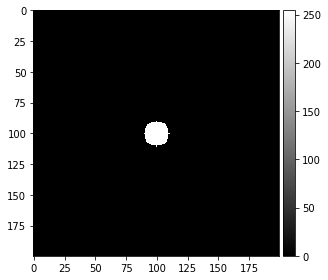

In [25]:
# Create a (200x200) with zeros(you can think of it as a black (200x200) image)
(w, h) = (200, 200)
LPF = np.zeros((w, h))

center = (100,100) # Coordinates of the center of the circle
r = 10 # Radius of the circle

LPF = cv2.circle(LPF, center, r, (255, 255, 255), -1) # Create the circle on the image

# Save and plot the resulting LPF
cv2.imwrite("LPF.png",LPF)
io.imshow("LPF.png", cmap='gray');

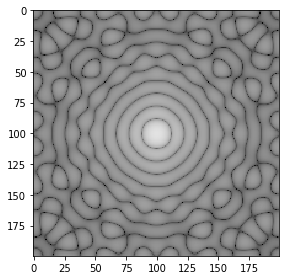

In [13]:
# Take DFT of LPF
f_LPF = np.fft.fftshift(np.fft.fft2(LPF))
LPF_dft = 20 * np.log(np.abs(f_LPF + 1e-8))

#  Save and plot the result
cv2.imwrite("LPF_dft.png",LPF_dft)
io.imshow("LPF_dft.png")

## Filtering with an Ideal Low Pass Filter(LPF)

Since I've created an ideal LPF now I can start filtering images. I will firstly start by filtering the half white and half black image.

In [14]:
# Applying ideal LPF to img_a
f_a_LPF_dft_1 = f_a * f_LPF

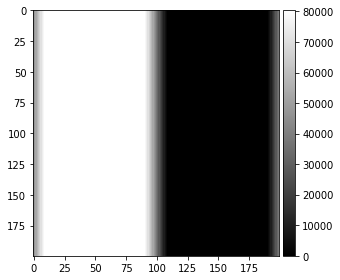

In [24]:
# Applying inverse DFT
f_ishift = np.fft.ifftshift(f_a_LPF_dft_1)
img_a_LPF_1 = np.fft.ifft2(f_ishift)
img_a_LPF_1 = np.abs(img_a_LPF_1)
img_a_LPF_1 /= 256
img_a_LPF_1 = np.flipud(np.fliplr(img_a_LPF_1)) # Flip the image back to obtain the original form

# Plot the resulting image
io.imshow(img_a_LPF_1, cmap='gray')

In [16]:
# Applying ideal LPF to img_b
f_b_LPF_dft_1 = f_b * f_LPF

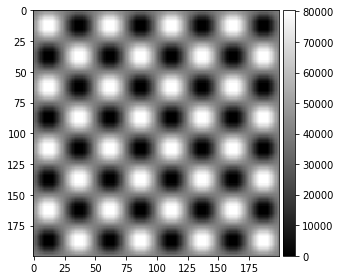

In [17]:
# Applying inverse DFT
f_ishift = np.fft.ifftshift(f_b_LPF_dft_1)
img_b_LPF_1 = np.fft.ifft2(f_ishift)
img_b_LPF_1 = np.abs(img_b_LPF_1)
img_b_LPF_1 /= 256
img_b_LPF_1 = np.flipud(np.fliplr(img_b_LPF_1)) # Flip the image back to obtain the original form

# Plot the resulting image
io.imshow(img_b_LPF_1, cmap='gray')

Here in this part we've observed the output of the LPF with a radius of 10 pixels. Now let's try it out again with 60 as radius

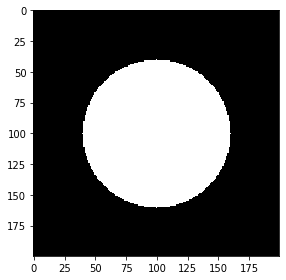

In [18]:
# Create a (200x200) with zeros(you can think of it as a black (200x200) image)
(w, h) = (200, 200)
LPF_2 = np.zeros((w, h))

center = (100,100) # Coordinates of the center of the circle
r = 60 # Radius of the circle

LPF_2 = cv2.circle(LPF_2, center, r, (255, 255, 255), -1) # Create the circle on the image

# Save and plot the resulting LPF
cv2.imwrite("LPF_2.png",LPF_2)
io.imshow("LPF_2.png", cmap='gray')

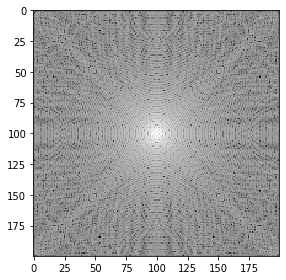

In [19]:
# Take DFT of LPF
f_LPF_2 = np.fft.fftshift(np.fft.fft2(LPF_2))
LPF_dft_2 = 20 * np.log(np.abs(f_LPF_2 + 1e-8))

#  Save and plot the result
cv2.imwrite("LPF_dft_2.png",LPF_dft_2)
io.imshow("LPF_dft_2.png")

In [20]:
# Applying ideal LPF to img_a
f_a_LPF_dft_2 = f_a * f_LPF_2

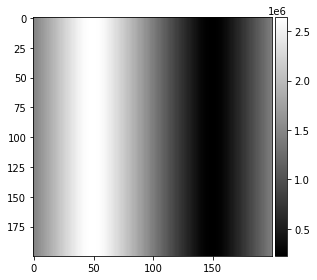

In [21]:
# Applying inverse DFT
f_ishift = np.fft.ifftshift(f_a_LPF_dft_2)
img_a_LPF_2 = np.fft.ifft2(f_ishift)
img_a_LPF_2 = np.abs(img_a_LPF_2)
img_a_LPF_2 /= 256
img_a_LPF_2 = np.flipud(np.fliplr(img_a_LPF_2)) # Flip the image back to obtain the original form

# Plot the resulting image
io.imshow(img_a_LPF_2, cmap='gray')

In [22]:
# Applying ideal LPF to img_b
f_b_LPF_dft_2 = f_b * f_LPF_2

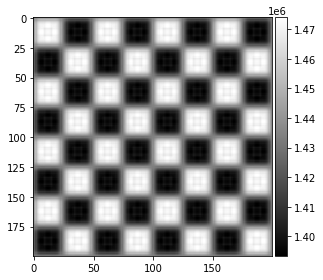

In [23]:
# Applying inverse DFT
f_ishift = np.fft.ifftshift(f_b_LPF_dft_2)
img_b_LPF_2 = np.fft.ifft2(f_ishift)
img_b_LPF_2 = np.abs(img_b_LPF_2)
img_b_LPF_2 /= 256
img_b_LPF_2 = np.fliplr(img_b_LPF_2) # Flip the image back to obtain the original form

# Plot the resulting image
io.imshow(img_b_LPF_2, cmap='gray')

**CONCLUSION:**

As you can see above, increasing the radius of the ideal LPF increases the filtering applied on the image.